<a href="https://colab.research.google.com/github/animesh-am/CodeClause_Internship/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
!wget https://raw.githubusercontent.com/shrikant-temburwar/Loan-Prediction-Dataset/master/train.csv -O train.csv

--2023-09-13 05:26:22--  https://raw.githubusercontent.com/shrikant-temburwar/Loan-Prediction-Dataset/master/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38013 (37K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  37.12K  --.-KB/s    in 0.001s  

2023-09-13 05:26:22 (38.5 MB/s) - ‘train.csv’ saved [38013/38013]



In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.shape

(614, 13)

In [8]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

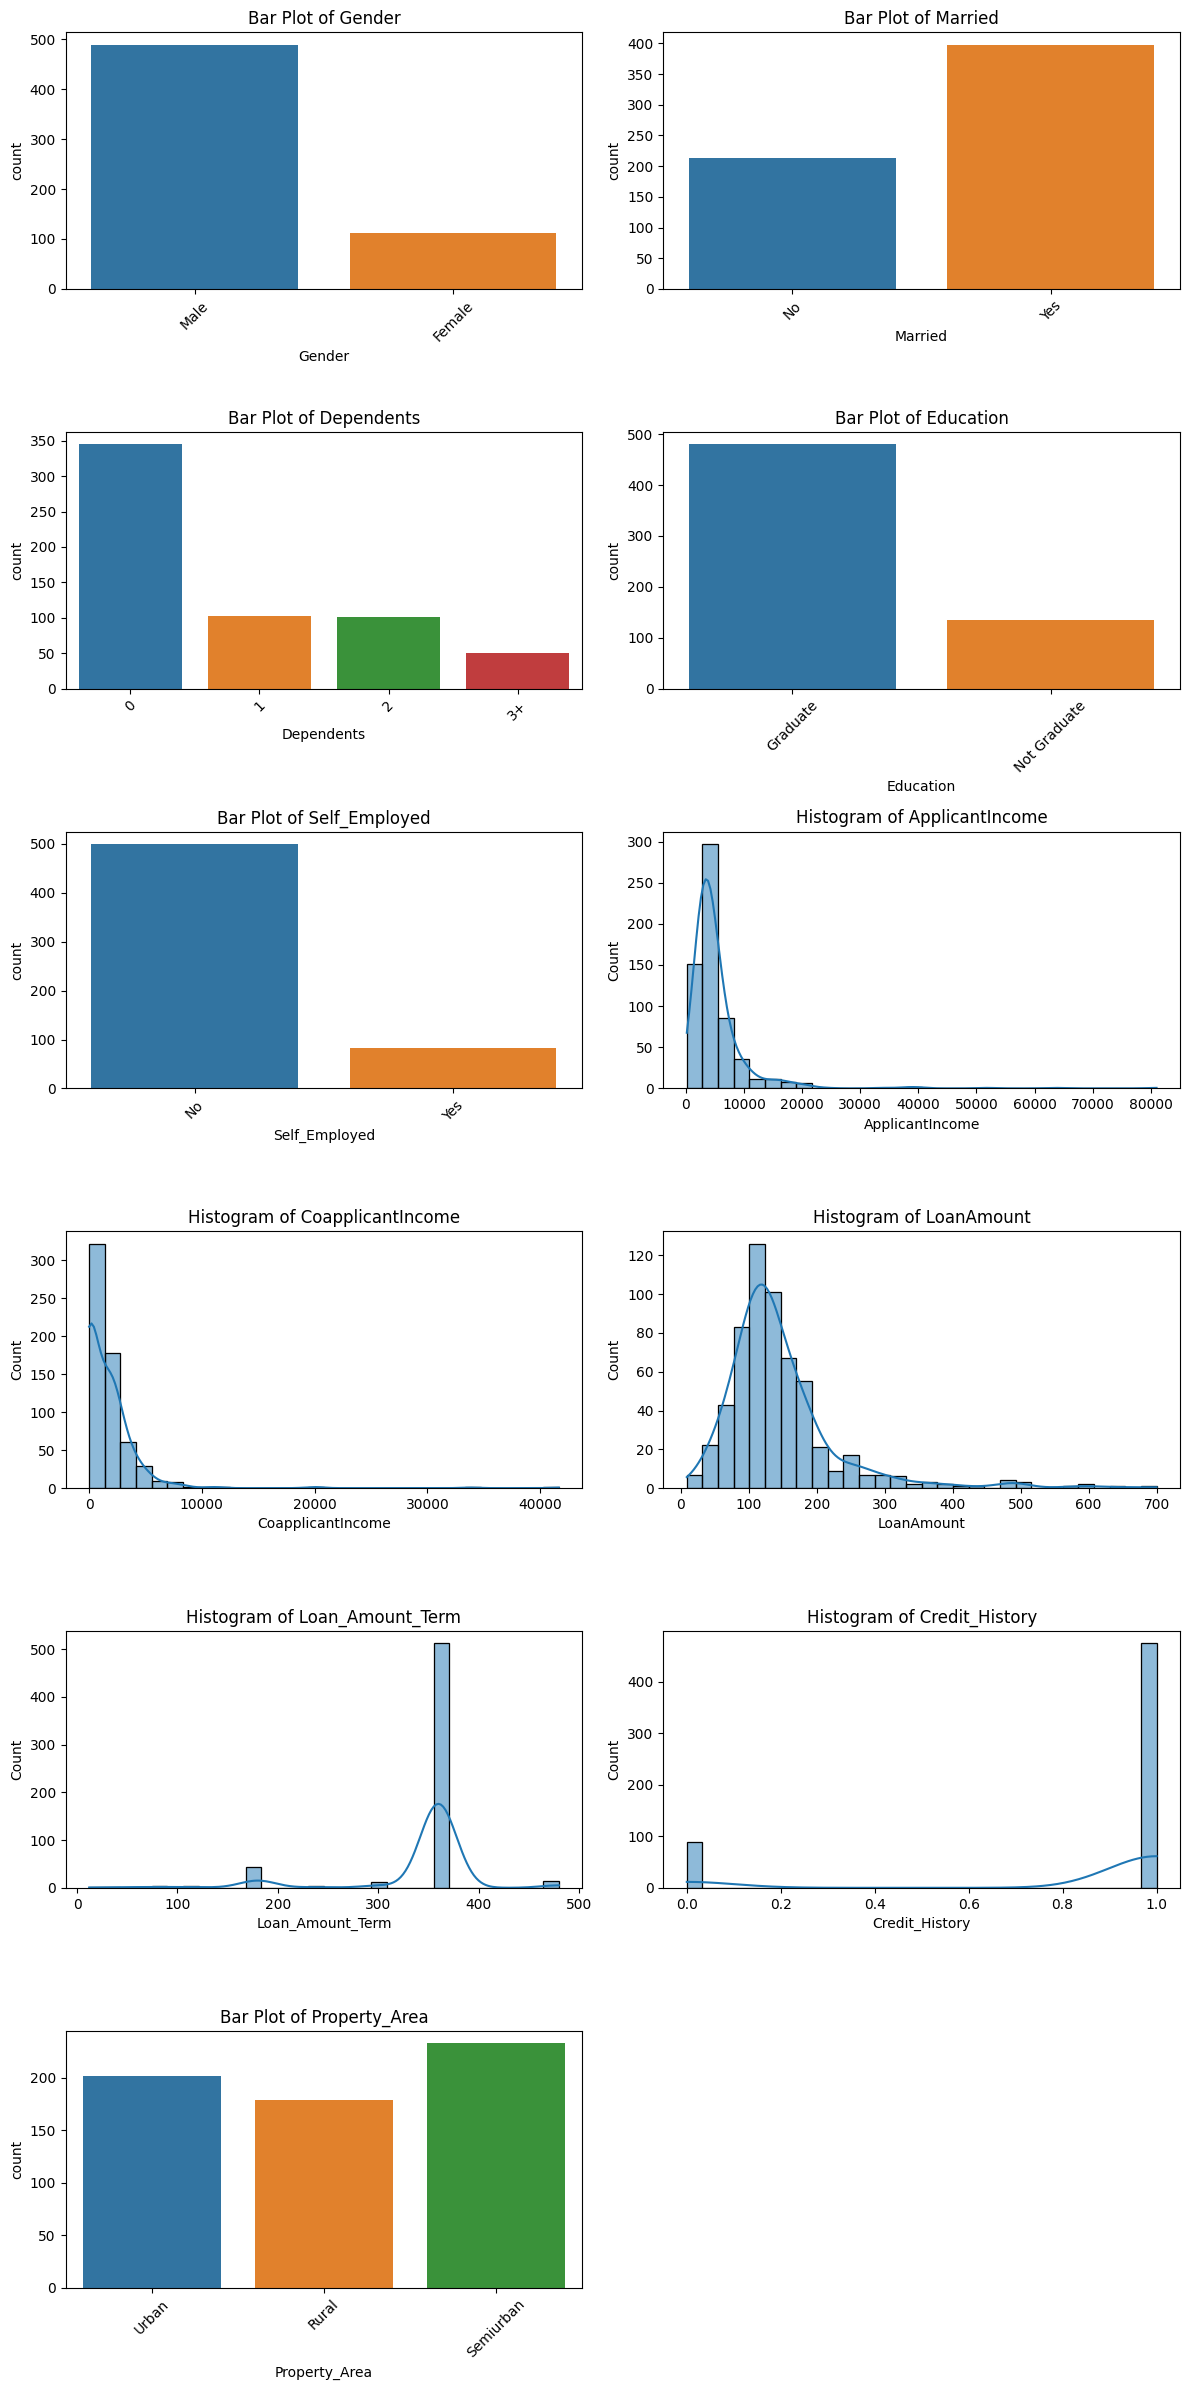

In [9]:
columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
           'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
           'Loan_Amount_Term', 'Credit_History', 'Property_Area']

num_plots = len(columns)
if num_plots % 2 != 0:
    num_plots += 1

# Create subplots
fig, axs = plt.subplots(num_plots // 2, 2, figsize=(12, num_plots*2))

# Flatten axis array and remove unused axes if columns is odd
axs = axs.ravel()
if len(columns) % 2 != 0:
    fig.delaxes(axs[-1])

for i, col in enumerate(columns):
    ax = axs[i]

    if df[col].dtype == 'object':  # Categorical data
        sns.countplot(data=df, x=col, ax=ax)
        ax.set_title(f'Bar Plot of {col}')
        # Ensure x-labels don't overlap
        for label in ax.get_xticklabels():
            label.set_rotation(45)
    else:  # Numerical data
        sns.histplot(df[col], bins=30, kde=True, ax=ax)
        ax.set_title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

In [10]:
missing_values = df.isnull().sum()
print(missing_values)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [11]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode().iloc[0])

In [12]:
df['Married'] = df['Married'].fillna(df['Married'].mode().iloc[0])

In [13]:
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode().iloc[0])

In [14]:
df['Self_Employed'] = df['Self_Employed'].fillna('No')

In [15]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [16]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [17]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode().iloc[0])

In [18]:
missing_values = df.isnull().sum()
print(missing_values)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [19]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y


In [20]:
X = df.iloc[:, 1:12].values
y = df.iloc[:, 12].values

In [21]:
X

array([['Male', 'No', '0', ..., 360.0, 1.0, 'Urban'],
       ['Male', 'Yes', '1', ..., 360.0, 1.0, 'Rural'],
       ['Male', 'Yes', '0', ..., 360.0, 1.0, 'Urban'],
       ...,
       ['Male', 'Yes', '1', ..., 360.0, 1.0, 'Urban'],
       ['Male', 'Yes', '2', ..., 360.0, 1.0, 'Urban'],
       ['Female', 'No', '0', ..., 360.0, 0.0, 'Semiurban']], dtype=object)

In [22]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [24]:
X_train

array([['Male', 'Yes', '1', ..., 360.0, 1.0, 'Urban'],
       ['Male', 'No', '0', ..., 360.0, 1.0, 'Rural'],
       ['Male', 'No', '2', ..., 360.0, 1.0, 'Rural'],
       ...,
       ['Male', 'Yes', '3+', ..., 360.0, 1.0, 'Semiurban'],
       ['Male', 'Yes', '0', ..., 360.0, 1.0, 'Urban'],
       ['Female', 'Yes', '0', ..., 360.0, 1.0, 'Semiurban']], dtype=object)

In [25]:
y_train

array(['Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N

In [26]:
X_test

array([['Male', 'No', '0', ..., 360.0, 1.0, 'Semiurban'],
       ['Female', 'No', '0', ..., 360.0, 1.0, 'Semiurban'],
       ['Male', 'Yes', '0', ..., 360.0, 1.0, 'Urban'],
       ...,
       ['Male', 'Yes', '0', ..., 360.0, 1.0, 'Urban'],
       ['Male', 'No', '0', ..., 360.0, 1.0, 'Semiurban'],
       ['Male', 'Yes', '1', ..., 360.0, 0.0, 'Semiurban']], dtype=object)

In [27]:
y_test

array(['Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'N', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N'],
      dtype=object)

In [28]:
label_encoders = {}
label_columns = [0, 1, 2, 3, 4, 10]

for col in label_columns:
    le = LabelEncoder()
    X_train[:, col] = le.fit_transform(X_train[:, col].astype(str))
    X_test[:, col] = le.transform(X_test[:, col].astype(str))
    label_encoders[col] = le

In [29]:
X_train

array([[1, 1, 1, ..., 360.0, 1.0, 2],
       [1, 0, 0, ..., 360.0, 1.0, 0],
       [1, 0, 2, ..., 360.0, 1.0, 0],
       ...,
       [1, 1, 3, ..., 360.0, 1.0, 1],
       [1, 1, 0, ..., 360.0, 1.0, 2],
       [0, 1, 0, ..., 360.0, 1.0, 1]], dtype=object)

In [30]:
X_test

array([[1, 0, 0, ..., 360.0, 1.0, 1],
       [0, 0, 0, ..., 360.0, 1.0, 1],
       [1, 1, 0, ..., 360.0, 1.0, 2],
       ...,
       [1, 1, 0, ..., 360.0, 1.0, 2],
       [1, 0, 0, ..., 360.0, 1.0, 1],
       [1, 1, 1, ..., 360.0, 0.0, 1]], dtype=object)

In [31]:
print(np.unique(y_train))

['N' 'Y']


In [32]:
print(np.unique(y_test))

['N' 'Y']


In [33]:
le_y = LabelEncoder()
y_train = le_y.fit_transform(y_train)
y_test = le_y.transform(y_test)

In [34]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
classifier = LogisticRegression(random_state = 0)

In [36]:
from sklearn.model_selection import cross_val_score

# Apply 10-fold cross-validation
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)

print(f"Mean Accuracy: {accuracies.mean() * 100:.2f}%")
print(f"Standard Deviation: {accuracies.std() * 100:.2f}%")

Mean Accuracy: 80.22%
Standard Deviation: 4.61%


In [37]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [38]:
y_pred = classifier.predict(X_test)

In [39]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [40]:
print('The accuracy of Logistic Regression is: ', accuracy_score(y_pred, y_test)*100)

The accuracy of Logistic Regression is:  83.76623376623377


In [41]:
print(confusion_matrix(y_test, y_pred))

[[ 20  23]
 [  2 109]]


In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.47      0.62        43
           1       0.83      0.98      0.90       111

    accuracy                           0.84       154
   macro avg       0.87      0.72      0.76       154
weighted avg       0.85      0.84      0.82       154



In [43]:
# Get the predicted probabilities for the positive class (usually denoted by 1)
y_prob = classifier.predict_proba(X_test)[:, 1]

# Compute ROC-AUC score
auc_score = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", auc_score)

ROC-AUC Score: 0.7467001885606537


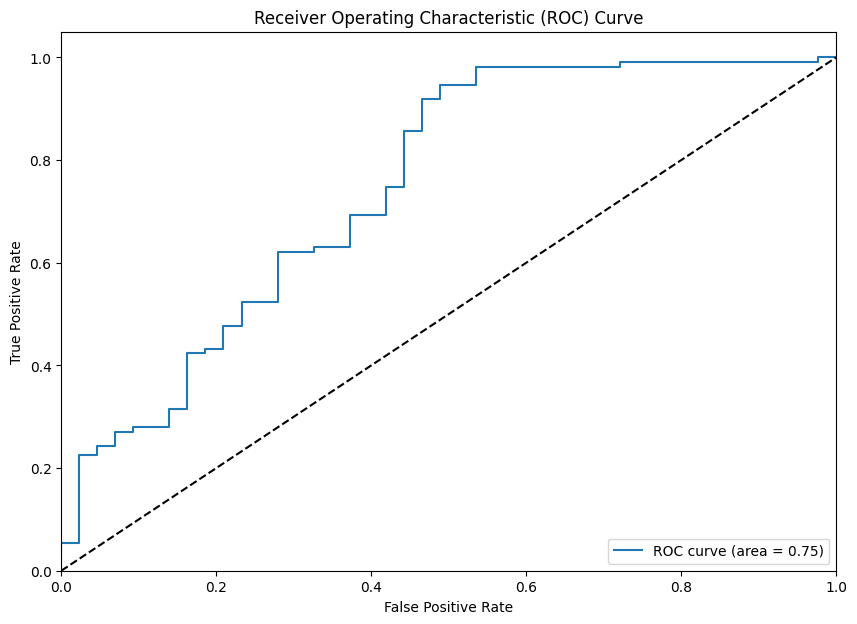

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [45]:
def make_prediction(input_data):
    input_np = np.array([input_data])
    for col, encoder in label_encoders.items():
        input_np[:, col] = encoder.transform(input_np[:, col])
    scaled_input = sc.transform(input_np)
    prediction = classifier.predict(scaled_input)
    return 'Y' if prediction[0] == 1 else 'N'

In [46]:
result = make_prediction(['Male', 'Yes', '0', 'Graduate', 'No', 5000, 0, 150, 360, 1, 'Urban'])
if result == 'Y':
    print(f"Loan Status: Yes")
else:
    print(f"Loan Status: No")

Loan Status: Yes


In [47]:
result = make_prediction(['Male', 'No', '1', 'Graduate', 'Yes', 5, 0, 150, 12, 0, 'Urban'])
if result == 'Y':
    print(f"Loan Status: Yes")
else:
    print(f"Loan Status: No")

Loan Status: No
